In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('tidy_2.csv')
df_copy = df.copy()

## 새로운 칼럼 만들기

### 1) 대상인원 칼럼 만들기

In [23]:
df['대상인원'] = df['대상인원'].copy().str.extract(r'[\s|외|총|등](\d+)\s?[명|인]?')
# 대상인원이 없는 경우 운전기사 회식, 격려금 지급 등 맛집과 상관없는 경우가 많으니 삭제
df = df.dropna(axis=0, subset=['대상인원'], how='all')
df['대상인원'] = df['대상인원'].copy().astype(int)


### 2) 년도별로 그룹화하기

In [24]:
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]
df_2018 = df[df['year'] == 2018]

dfs = [df, df_2016, df_2017, df_2018]
df_2016.shape, df_2017.shape, df_2018.shape

((3977, 14), (14043, 14), (8672, 14))

### 3) 집행지명으로 그룹화하기

In [25]:
def group_place(df):
    df_group = df.groupby('집행지명')\
            ['집행지명', 'cnt', '집행금액', '대상인원']\
            .sum().reset_index()
    return df_group

df_2016_group = group_place(df_2016)
df_2017_group = group_place(df_2017)
df_2018_group = group_place(df_2018)
df_group = group_place(df)

df_groups = [df_group, df_2016_group, df_2017_group, df_2018_group]
df_group.shape, df_2016_group.shape, df_2017_group.shape, df_2018_group.shape

((3940, 4), (1117, 4), (2466, 4), (1909, 4))

In [26]:
# 회당, 인당 금액을 구해보자. 
def price_per_num_people(df_group):
    df_group['회당집행금액'] = df_group['집행금액'] / df_group['cnt']
    df_group['인당집행금액'] = df_group['집행금액'] / df_group['대상인원']
    df_group['회당명수'] = df_group['대상인원'] / df_group['cnt']

for df_group in df_groups:
    df_group = price_per_num_people(df_group)

df_groups[0].head()

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
0,(월)월향,1,34000.0,2,34000.000000,17000.000000,2.000000
1,(주)강가,7,857000.0,30,122428.571429,28566.666667,4.285714
2,(주)광화문아띠,1,40000.0,2,40000.000000,20000.000000,2.000000
3,(주)광화문아띠명동,1,455500.0,40,455500.000000,11387.500000,40.000000
4,(주)교보문고,2,160000.0,14,80000.000000,11428.571429,7.000000


# 서울시 진짜 맛집 프로젝트

## 카테고리별 맛집

### 1. 가장 자주 간 식당 (전체 공무원)

In [27]:
def by_cnt(df_group):
    df_group = df_group.sort_values(by='cnt', ascending=False)
    df_group['회당명수'] = round(df_group['회당명수']).astype(int)
    df_group['회당집행금액'] = round(df_group['회당집행금액']).astype(int)
    df_group['인당집행금액'] = round(df_group['인당집행금액']).astype(int)
    df_group['집행금액'] = round(df_group['집행금액']).astype(int)
    return df_group

for i, df_group in enumerate(df_groups):
    df_groups[i] = by_cnt(df_group)

In [30]:
# 전체 공무원
df_groups[0].head(5)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
3128,참숯골,739,87835920,5040,118858,17428,7
1098,동해일식,421,66255400,2667,157376,24843,6
1569,바닷가작은부엌,333,49478200,2084,148583,23742,6
1073,동원참치,328,43651000,1900,133082,22974,6
1095,동해수산,288,43712000,1738,151778,25151,6


In [29]:
# 2016년
df_groups[1].head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
820,제일가든,87,20521020,921,235874,22281,11
305,라칸티나,68,12256400,359,180241,34140,5
880,참숯골,67,7294100,424,108867,17203,6


In [10]:
# 2017년
df_groups[2].head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1896,참숯골,385,41967120,2577,109006,16285,7
2151,한가람,225,22636550,1357,100607,16681,6
633,동해수산,186,24744000,1006,133032,24596,5


In [95]:
# 2018년
df_groups[3].head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1350,참숯골,238,31645400,1701,132964,18604,7
457,동해일식,188,30410000,1253,161755,24270,7
1356,창고43,126,14937300,807,118550,18510,6


### 2. 가장 돈을 많이 쓴 식당 

In [96]:
# 전체
df_groups[0].sort_values(by='집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
2966,참숯골,684,79914620,4653,116834,17175,7
1006,동해일식,377,55124400,2248,146219,24522,6
1103,라칸티나,271,48128400,1812,177596,26561,7


In [97]:
# 2016년
df_groups[1].sort_values(by='집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
803,제일가든,74,17996020,794,243189,22665,11
301,라칸티나,68,12256400,359,180241,34140,5
761,이설당한과,1,10040000,251,10040000,40000,251


In [98]:
# 2017년
df_groups[2].sort_values(by='집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1896,참숯골,385,41967120,2577,109006,16285,7
633,동해수산,186,24744000,1006,133032,24596,5
1790,제일가든,158,23975000,1231,151741,19476,8


In [99]:
# 2018년
df_groups[3].sort_values(by='집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1350,참숯골,238,31645400,1701,132964,18604,7
457,동해일식,188,30410000,1253,161755,24270,7
553,만복림,117,22605700,985,193211,22950,8


### 3. 회당 집행금액이 가장 많은 식당
(30회 이상 방문, 전체 공무원)

In [100]:
for i, df_group in enumerate(df_groups):
    df_groups[i] = df_group[df_group['cnt']>30]

In [334]:
# 전체
df_groups[0].sort_values(by='회당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
868,더미,107,32091000,1227,299916,26154,11
2913,진미족발,55,14689500,762,267082,19278,14
2004,송학,60,15229000,583,253817,26122,10


In [335]:
# 2016년
df_groups[1].sort_values(by='회당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
803,제일가든,74,17996020,794,243189,22665,11
369,몽중헌,33,7339100,210,222397,34948,6
269,동해수산,41,7491000,286,182707,26192,7


In [336]:
# 2017년 
df_groups[2].sort_values(by='회당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
546,더미,43,10678000,405,248326,26365,9
1540,오륙도,57,11692000,497,205123,23525,9
1113,삼원,41,7991000,329,194902,24289,8


In [337]:
# 2018년
df_groups[3].sort_values(by='회당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
380,더미,48,16554000,655,344875,25273,14
1060,열빈,64,13733000,643,214578,21358,10
553,만복림,117,22605700,985,193211,22950,8


### 4. 인당 집행금액이 가장 많은 식당

In [105]:
# 전체
df_groups[0].sort_values(by='인당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1154,루이,32,5866800,180,183338,32593,6
1372,몽중헌,62,12552500,403,202460,31148,6
797,달개비자연음식,47,9173950,310,195190,29593,7


#### 가성비 맛집

In [32]:
aa = df_groups[0].sort_values(by='인당집행금액', ascending=True)
aa = aa[(aa['cnt']> 100) & (aa['인당집행금액']>10000) & (aa['인당집행금액']<15000)]
aa.sort_values(by='cnt', ascending=False)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
2499,영덕회식당,167,16507020,1115,98844,14805,7
2700,원주추어탕,165,8903600,668,53961,13329,4
1957,서울삼계탕,159,22755000,1689,143113,13472,11
3697,호아빈,117,7550500,504,64534,14981,4
2627,왕왕생고기,114,9141000,619,80184,14767,5
2741,육대장,104,6227700,488,59882,12762,5
1516,미가한식,103,6660800,470,64668,14172,5


In [106]:
# 2016
# 김영란법 생기기 전인가? 3만원이 넘는다. 
df_groups[1].sort_values(by='인당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
369,몽중헌,33,7339100,210,222397,34948,6
301,라칸티나,68,12256400,359,180241,34140,5
270,동해일식,44,5707400,180,129714,31708,4


In [107]:
# 2017
df_groups[2].sort_values(by='인당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
817,메이징에이,35,4752500,176,135786,27003,5
546,더미,43,10678000,405,248326,26365,9
557,더테이블,67,11078000,425,165343,26066,6


In [108]:
# 2018
df_groups[3].sort_values(by='인당집행금액', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1092,오륙도,31,5130500,198,165500,25912,6
128,강가,33,4131500,160,125197,25822,5
380,더미,48,16554000,655,344875,25273,14


### 5. 가장 많은 사람이 간 식당

In [109]:
# 전체
df_groups[0].sort_values(by='대상인원', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
2966,참숯골,684,79914620,4653,116834,17175,7
2923,진주회관,115,6459000,2537,56165,2546,22
1006,동해일식,377,55124400,2248,146219,24522,6


In [110]:
# 2016
df_groups[1].sort_values(by='대상인원', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
803,제일가든,74,17996020,794,243189,22665,11
860,참숯골,60,6074100,362,101235,16779,6
301,라칸티나,68,12256400,359,180241,34140,5


In [111]:
# 2017
df_groups[2].sort_values(by='대상인원', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1896,참숯골,385,41967120,2577,109006,16285,7
1867,진주회관,62,3510000,2314,56613,1517,37
2151,한가람,225,22636550,1357,100607,16681,6


In [112]:
# 2018
df_groups[3].sort_values(by='대상인원', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1350,참숯골,238,31645400,1701,132964,18604,7
457,동해일식,188,30410000,1253,161755,24270,7
553,만복림,117,22605700,985,193211,22950,8


### 6. 단체손님이 많이 가는 식당
8명 이상의 단체손님이 가는 식당 중 가장 자주 가는 식당

In [44]:
# 전체
df_groups[0][df_groups[0]['회당명수']>7].sort_values(by='cnt', ascending=False).head(6)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
2961,제일가든,273,48593020,2364,177996,20555,9
2484,열빈,198,39417500,2003,199078,19679,10
1315,만복림,169,30899800,1369,182839,22571,8
1850,산채향,168,27718000,1300,164988,21322,8
1957,서울삼계탕,159,22755000,1689,143113,13472,11
3084,진주회관,127,7058000,2583,55575,2732,20


In [114]:
# 2016년
# 2016년엔 단체로 가지 않은 것일까, 데이터가 적은 것일까
df_groups[1][df_groups[1]['회당명수']>7].sort_values(by='cnt', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
803,제일가든,74,17996020,794,243189,22665,11


In [115]:
# 2017년
df_groups[2][df_groups[2]['회당명수']>7].sort_values(by='cnt', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
1790,제일가든,158,23975000,1231,151741,19476,8
1493,열빈,104,19829500,1118,190668,17737,11
1103,산채향,93,16030000,747,172366,21459,8


In [116]:
# 2018년
# 2016, 2017년에 사랑받던 제일가든이 없어지고
# 열빈이 회식 대세인가보다
df_groups[3][df_groups[3]['회당명수']>7].sort_values(by='cnt', ascending=False).head(3)

,집행지명,cnt,집행금액,대상인원,회당집행금액,인당집행금액,회당명수
553,만복림,117,22605700,985,193211,22950,8
1060,열빈,64,13733000,643,214578,21358,10
380,더미,48,16554000,655,344875,25273,14


## 부서별로 살펴보기

In [117]:
# 부서별로 묶기
def make_divs(df):
    df_divs = df.groupby('1소속부서')['cnt', '대상인원', '집행금액']\
            .sum().reset_index()
    # 인당/회당 금액 내기
    df_divs['인당집행금액'] = df_divs['집행금액'] / df_divs['대상인원']
    df_divs['회당집행금액'] = df_divs['집행금액'] / df_divs['cnt']
    df_divs['인당집행금액'] = round(df_divs['인당집행금액']).astype(int)
    df_divs['회당집행금액'] = round(df_divs['회당집행금액']).astype(int)
    return df_divs

df_divs=[]
for i, df in enumerate(dfs):
    df_divs.append(make_divs(df))

### 1. 가장 회식을 자주 한 부서

In [324]:
# 전체
all_divs = df_divs[0].sort_values(by='cnt', ascending=False).head(3)
all_divs.columns = ['소속부서', '횟수', '참여인원', \
                    '집행금액', '인당집행금액', '회당집행금액']
all_divs['집행금액'] = all_divs['집행금액'].astype(int)
all_divs

,소속부서,횟수,참여인원,집행금액,인당집행금액,회당집행금액
25,행정국,2388,14993,297689495,19855,124661
16,시민소통기획관,2045,13525,276098922,20414,135012
20,정무부시장,1534,8996,228080150,25354,148683


In [119]:
# 2016
df_divs[1].sort_values(by='cnt', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
19,정무부시장,625,3266,90778450.0,27795,145246
23,행정국,395,2507,46919300.0,18715,118783
11,서울특별시장,286,3501,82190120.0,23476,287378


In [120]:
# 2017
df_divs[2].sort_values(by='cnt', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
25,행정국,1280,7964,154039840.0,19342,120344
16,시민소통기획관,1168,8284,164733999.0,19886,141039
6,대변인,871,4841,95435580.0,19714,109570


In [121]:
# 2018
# 행정국 꾸준히 1위
df_divs[3].sort_values(by='cnt', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
24,행정국,692,4321,95344355.0,22065,137781
15,시민소통기획관,641,3895,81016853.0,20800,126391
3,기획조정실,558,3293,75255710.0,22853,134867


### 2. 가장 돈을 많이 쓴 부서

In [122]:
# 전체
df_divs[0].sort_values(by='집행금액', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
25,행정국,2388,14993,297689495.0,19855,124661
16,시민소통기획관,2045,13525,276098922.0,20414,135012
24,행정2부시장,722,12019,230972660.0,19217,319907


In [325]:
# 2016
df_divs[1].sort_values(by='집행금액', ascending=False).head(5)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
19,정무부시장,625,3266,90778450.0,27795,145246
11,서울특별시장,286,3501,82190120.0,23476,287378
22,행정2부시장,258,3428,75557400.0,22041,292858
21,행정1부시장,266,1832,50613920.0,27628,190278
23,행정국,395,2507,46919300.0,18715,118783


In [124]:
# 2017
df_divs[2].sort_values(by='집행금액', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
16,시민소통기획관,1168,8284,164733999.0,19886,141039
25,행정국,1280,7964,154039840.0,19342,120344
4,기획조정실,868,5659,101052048.0,17857,116419


In [125]:
# 2018
df_divs[3].sort_values(by='집행금액', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
24,행정국,692,4321,95344355.0,22065,137781
15,시민소통기획관,641,3895,81016853.0,20800,126391
3,기획조정실,558,3293,75255710.0,22853,134867


### 3. 가장 비싼 것을 먹는 부서

In [126]:
# 전체
df_divs[0].sort_values(by='인당집행금액', ascending=False).head(3)
# 시장보다 부시장님들이 더 비싼 것을 먹는다!
# 시장님은 직원들 격려 피자를 자주 사주셔서 평균 금액이 내려간듯...
# 부시장은 1명이라 총금액은 적지만, 비싼 것을 먹는당

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
23,행정1부시장,721,6569,166838070.0,25398,231398
20,정무부시장,1534,8996,228080150.0,25354,148683
11,비상기획관,359,1945,42716760.0,21962,118988


In [127]:
# 2016년
# 역시 김영란법 시행 전이라 3만원이 넘는다. 
df_divs[1].sort_values(by='인당집행금액', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
19,정무부시장,625,3266,90778450.0,27795,145246
21,행정1부시장,266,1832,50613920.0,27628,190278
11,서울특별시장,286,3501,82190120.0,23476,287378


In [128]:
# 2017년
# 라고 생각했는데 시행 후에도 3만원 넘는것 무엇...
df_divs[2].sort_values(by='인당집행금액', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
23,행정1부시장,308,2815,72502090.0,25756,235396
20,정무부시장,613,3691,86771100.0,23509,141552
11,비상기획관,214,1051,22807750.0,21701,106578


In [129]:
# 2018년
df_divs[3].sort_values(by='인당집행금액', ascending=False).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
19,정무부시장,296,2039,50530600.0,24782,170711
5,대변인,428,2142,51120479.0,23866,119440
3,기획조정실,558,3293,75255710.0,22853,134867


### 4. 가장 싼 것을 먹는 부서

In [130]:
# 전체
df_divs[0].sort_values(by='인당집행금액', ascending=True).head(3)
# 인당 6000원대라니 8배 차이나는 이 빈부격차 무엇..

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
5,기후환경본부,1252,8921,114193360.0,12801,91209
3,기술심사담당관,114,1030,14562200.0,14138,127739
7,도시공간개선단,318,1746,26354982.0,15094,82877


In [131]:
# 2016년
df_divs[1].sort_values(by='인당집행금액', ascending=True).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
14,시민건강국,62,570,6750010.0,11842,108871
5,기후환경본부,83,496,6951330.0,14015,83751
9,복지본부,107,511,7766480.0,15199,72584


In [132]:
# 2017년
df_divs[2].sort_values(by='인당집행금액', ascending=True).head(3)

,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
5,기후환경본부,746,6015,66164101.0,11000,88692
3,기술심사담당관,63,627,8544300.0,13627,135624
2,관광체육국,576,3374,51839805.0,15364,90000


In [329]:
# 2018년
# 재무국이 꾸준하게 하위권. 시의 예산을 보면 차마 비싼 것을 먹을 수 없는 것일까
df_divs[3].sort_values(by='인당집행금액', ascending=True).head(10).reset_index()

,index,1소속부서,cnt,대상인원,집행금액,인당집행금액,회당집행금액
0,18,재무국,432,3098,42172210.0,13613,97621
1,6,도시공간개선단,124,828,11298032.0,13645,91113
2,2,기술심사담당관,39,306,4277500.0,13979,109679
3,16,여성가족정책실,278,2108,32011185.0,15186,115148
4,12,서울혁신기획관,448,2362,36315160.0,15375,81061
5,13,시민감사옴부즈만위원회,224,992,16130320.0,16260,72010
6,23,행정2부시장,190,4063,68391660.0,16833,359956
7,14,시민건강국,242,1642,27970050.0,17034,115579
8,4,기후환경본부,423,2410,41077929.0,17045,97111
9,20,정보기획관,290,1381,23812910.0,17243,82113


#### 부시장 데이터

In [134]:
vice_mayor1 = df[df['1소속부서'] == '행정1부시장'][['집행지명','대상인원', '집행금액', '집행목적']]

In [191]:
vice_mayor1['인당집행금액'] = vice_mayor1['집행금액'] / vice_mayor1['대상인원']
vice_mayor1[vice_mayor1['인당집행금액'] > 29000].head(3)

,집행지명,대상인원,집행금액,집행목적,인당집행금액
2,삼다도,2,60000.0,시정 남북교류협력관련 자문회의,30000.0
5,（주）달개비자연음식,14,420000.0,시정 정책 정부협력 간담회,30000.0
16,（주）바닷가작은부엌,16,480000.0,시정 노동정책 관련 의견수렴 및 자문 간담회,30000.0


In [33]:
# 행정국
department = df_copy[df_copy['1소속부서'] == '행정국'][['집행지명','대상인원', '집행금액', '집행목적', 'cnt', 'year']]
department.shape, df_copy.shape

((2388, 6), (26974, 14))

In [45]:
department_group = department.groupby('집행지명').sum().sort_values(by='cnt', ascending=False).reset_index()
department_group.head(6)

,집행지명,집행금액,cnt,year
0,참숯골,11623000.0,85,171465.0
1,동해수산,9521000.0,58,116982.0
2,오복미역,4171000.0,44,88733.0
3,목포세발낙지,4830000.0,43,86729.0
4,월향,4278500.0,39,78665.0
5,왕왕샤브샤브,3649000.0,38,74617.0


In [176]:
mayor_group = mayor_group[mayor_group['집행지명']\
                          .str.contains('달개비') == True]

mayor_group

,집행지명,집행금액,cnt,year
0,달개비자연음식,6946050.0,29,54444.0
9,달개비,1517400.0,8,16135.0
11,（주）달개비자연음식,1445800.0,8,16144.0


In [177]:
mayor2 = mayor[mayor['집행지명'].str.contains('달개비') == True]

In [35]:
# 대변인
mayor_p = df_copy[df_copy['1소속부서'] == '대변인'][['집행지명','대상인원', '집행금액', '집행목적', 'cnt', 'year']]
mayor_p.shape, df_copy.shape

((1437, 6), (26974, 14))

In [37]:
mayor_p.groupby('집행지명').sum().sort_values(by='cnt', ascending=False).reset_index().head(5)

,집행지명,집행금액,cnt,year
0,참숯골,4214000.0,48,96822.0
1,남산집,3845000.0,29,58495.0
2,여수바다장어,4073000.0,27,54463.0
3,동해수산,2634000.0,22,44380.0
4,세림,2020000.0,20,40345.0


## 그래프 그리기

In [ ]:
# 연, 월로 그룹화 해주고
# 2018년 9-12월 채워주는 버전 만들기
# 분기별로 합쳐주기
# 그래프 그려주기

In [281]:
a = df.groupby('year')['cnt', '집행금액'].sum().reset_index()
a['year'] = a['year'].astype(int)
a['year'] = a['year'].astype(str)
a['집행금액'] = a['집행금액'].astype(int)
a.columns = ['연도', '횟수', '집행금액']
a

,연도,횟수,집행금액
0,2016,3780,574386070
1,2017,13386,1571448943
2,2018,7857,978996845


In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:82: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "


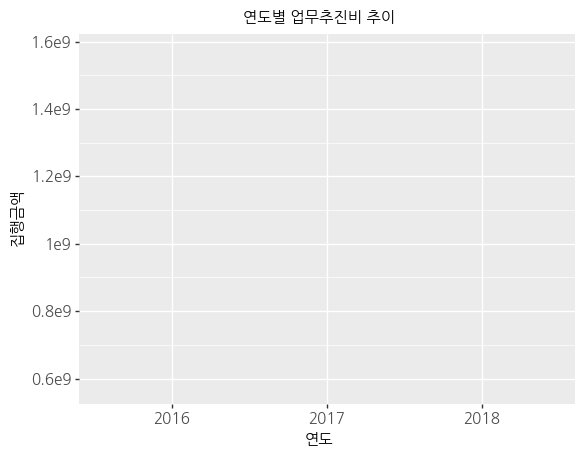

<ggplot: (-9223372026568079181)>

In [283]:
(ggplot(a)
 + aes(x='연도', y='집행금액')
 + geom_line()
 + ggtitle('연도별 업무추진비 추이')
 + theme(text=element_text(fontproperties='NanumGothic'))
)

In [319]:
many_purpose = df.groupby('집행목적')['집행목적', 'cnt', '집행금액'].sum().sort_values(by='cnt', ascending=False).reset_index().head(3)
many_purpose.columns = ['집행목적', '집행횟수', '집행금액']
many_purpose['집행금액'] = many_purpose['집행금액'].astype(int)
many_purpose

,집행목적,집행횟수,집행금액
0,현안업무 추진직원 격려 간담회 개최비용 지급,226,29172180
1,시정 운영 관련 유관부서 업무협의 간담회,137,16646650
2,시정 홍보 강화를 위한 언론기관 간담회,97,13258800


In [31]:
df_purpose = df.groupby('집행목적')['집행목적', 'cnt', '집행금액'].sum().sort_values(by='집행금액', ascending=False).reset_index().head(3)
df_purpose.columns = ['집행목적', '집행횟수', '집행금액']
df_purpose['집행금액'] = df_purpose['집행금액'].astype(int)
df_purpose

,집행목적,집행횟수,집행금액
0,현안업무 추진직원 격려 간담회 개최비용 지급,226,29172180
1,시정 운영 관련 유관부서 업무협의 간담회,137,16646650
2,시정 홍보 강화를 위한 국회 등 유관기관 간담회,57,13893900


## 서울시장 데이터 보기

In [43]:
df_mayor = df[df['1소속부서'] == '서울특별시장']
df_mayor.groupby('year').sum().reset_index()
df_mayor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 644
Data columns (total 14 columns):
1소속부서    643 non-null object
결제방법     643 non-null object
구분       643 non-null object
대상인원     643 non-null int32
집행금액     643 non-null float64
집행목적     643 non-null object
집행지주소    642 non-null object
집행지명     643 non-null object
year     633 non-null float64
month    643 non-null int64
day      639 non-null float64
time     639 non-null object
num      643 non-null int64
cnt      643 non-null int64
dtypes: float64(3), int32(1), int64(3), object(7)
memory usage: 72.8+ KB


In [39]:
df_mayor.loc[df_mayor['집행지명'].str.contains('달개비') == True, '집행지명'] = '달개비자연음식' 

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
df_mayor['cnt'] = df_mayor['cnt'].astype(int)
df_mayor_sort = df_mayor.groupby('집행지명').sum().sort_values(by='cnt', ascending=False).reset_index()
df_mayor_sort[['집행지명', 'cnt', '집행금액']]


C:\Users\jeeyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,집행지명,cnt,집행금액
0,달개비자연음식,45,9909250.0
1,몽중헌,27,7469000.0
2,동해수산,24,5254000.0
3,식객촌,21,5073000.0
4,통인가게,14,5400000.0
5,빚은,11,2208200.0
6,케익날다,10,4249000.0
7,수,10,2459000.0
8,나무와벽돌,8,2153500.0
9,CHAI797,8,1710200.0


## 워드클라우드 그리기

In [320]:
import re
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

df['집행목적'] = df['집행목적'].astype(str)
tokenizer = RegexTokenizer()
tokens = df['집행목적'].apply(tokenizer.tokenize)
tokens_df = pd.DataFrame(tokens)

In [305]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', \
                     width=800, height=600 ):
    wordcloud = WordCloud(
        font_path = '/Library/Fonts/NanumGothic.ttf', 
        background_color = backgroundcolor, 
        width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

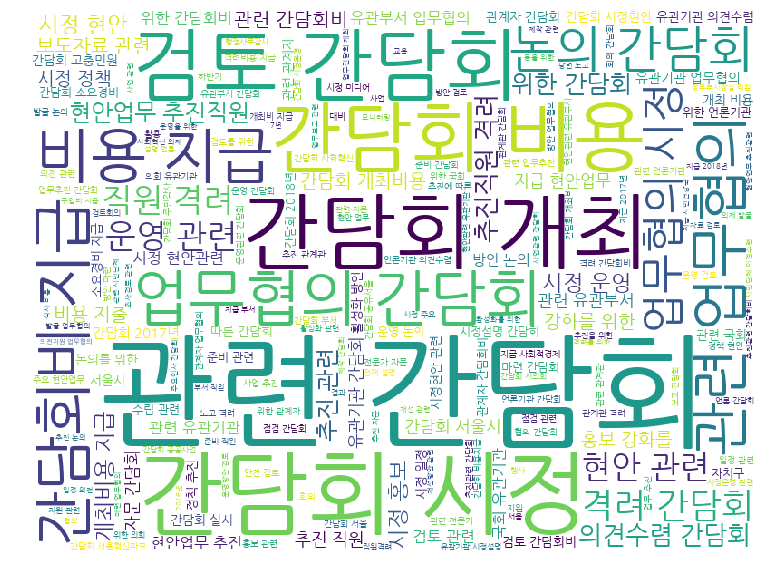

In [315]:
 displayWordCloud(' '.join(df['집행목적']))

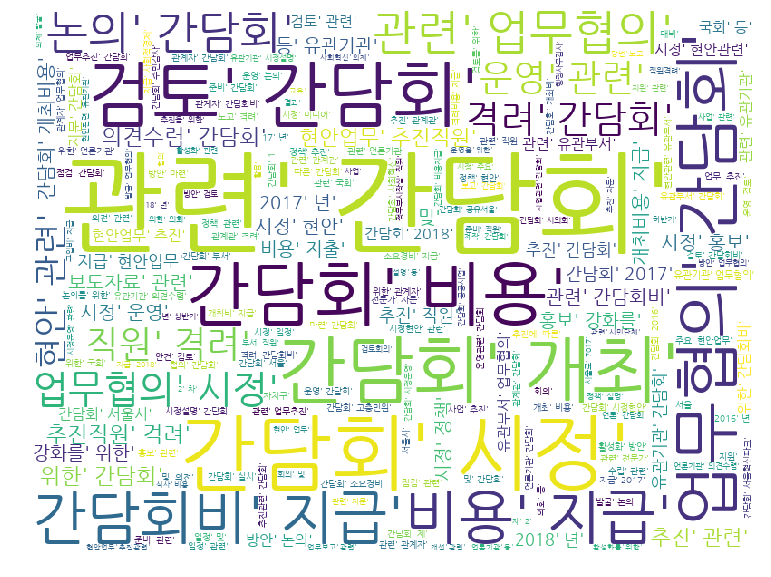

In [317]:
tokens_df['집행목적'] = tokens_df['집행목적'].astype(str)
displayWordCloud(' '.join(tokens_df['집행목적']))

## 그래프 그리기

In [8]:
from plotnine import *

In [6]:
# 연도/분기별 업무추진비 집행횟수/금액 추이
df_year = df.groupby('year')['cnt', '집행금액'].sum().reset_index()
df_year

,year,cnt,집행금액
0,2016.0,3780,5.743861e+08
1,2017.0,13386,1.571449e+09
2,2018.0,7857,9.789968e+08


In [23]:
df_year['집행금액'] = df_year['집행금액'].astype(int)
df_year['year'] = df_year['year'].astype(int)
# df_year['year'] = df_year['year'].astype(str)
df_year

,year,cnt,집행금액
0,2016,3780,574386070
1,2017,13386,1571448943
2,2018,7857,978996845


C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


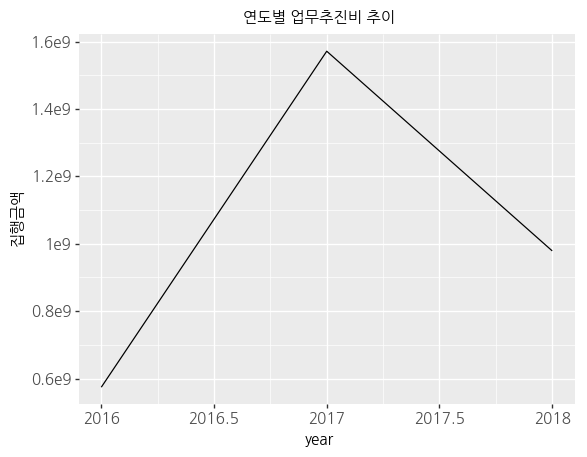

<ggplot: (46305763220)>

In [24]:
(ggplot(df_year, aes(x = 'year', y = '집행금액'))
    +geom_line(stat='identity')
    +ggtitle('연도별 업무추진비 추이')
    +theme(text=element_text(fontproperties='NanumGothic'))
)

# 0.5가 나오는게 싫어서 str로 바꿔주었더니 또 안되지용 ㅜㅜ

In [26]:
# 연도/분기별 인당집행금액 추이
df_qurter = df.groupby(['year', 'month'])['cnt', '집행금액'].sum().reset_index()
df_qurter.head()

,year,month,cnt,집행금액
0,2016.0,1,106,20748730.0
1,2016.0,2,132,36745100.0
2,2016.0,3,155,30432500.0
3,2016.0,4,141,28229680.0
4,2016.0,5,151,30353120.0


In [ ]:
# 이걸 분기별로 합쳐줄 수 있을까?

In [343]:
# 분기별 업무추진비 추이

In [344]:
# 서울시장 연도/분기별 집행횟수/금액 추이